In [13]:
import sys
sys.path.append('/Users/benj/Documents/SpEC-class')
import SEC_Class as sp
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cmcrameri.cm as cmc
from scipy import signal


In [14]:
# AndorPath is the current working directory
# CV_path is the current working directory
AndorPath = os.getcwd()
CV_path = os.getcwd()
# join andorpath with ANDORSPEC-0.0.0.0__0.pkl
AndorPath = os.path.join(AndorPath, "ANDORSPEC-0.0.0.0__0.pkl")
CV_path = os.path.join(CV_path, "CV-3.3.0.0__0.csv")

print(AndorPath, "\n", CV_path)     

/Users/benj/Documents/IrBenchmark/10mVs-1-2cycles/ANDORSPEC-0.0.0.0__0.pkl 
 /Users/benj/Documents/IrBenchmark/10mVs-1-2cycles/CV-3.3.0.0__0.csv


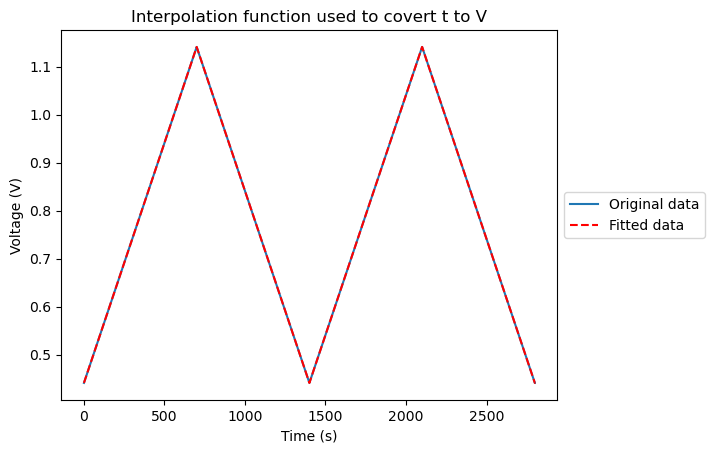

{0: {'Anodic':              t_s     Ewe_V       I_A
  0       0.100000  0.441011 -0.001328
  1       0.200000  0.441108 -0.001046
  2       0.300000  0.441205 -0.000826
  3       0.400000  0.441306 -0.000654
  4       0.500000  0.441409 -0.000518
  ...          ...       ...       ...
  6996  699.700012  1.140969  0.000564
  6997  699.799988  1.141075  0.000566
  6998  699.900024  1.141177  0.000567
  6999  700.000000  1.141270  0.000569
  7000  700.100037  1.141364  0.000570
  
  [7001 rows x 3 columns],
  'Cathodic':                t_s     Ewe_V       I_A
  7001    700.200012  1.141273  0.000568
  7002    700.299988  1.141164  0.000564
  7003    700.400024  1.141061  0.000562
  7004    700.500000  1.140978  0.000560
  7005    700.600037  1.140881  0.000557
  ...            ...       ...       ...
  13996  1399.700073  0.441408 -0.000021
  13997  1399.800049  0.441309 -0.000022
  13998  1399.900024  0.441209 -0.000022
  13999  1400.000000  0.441119 -0.000021
  14000  1400.099976  0.44

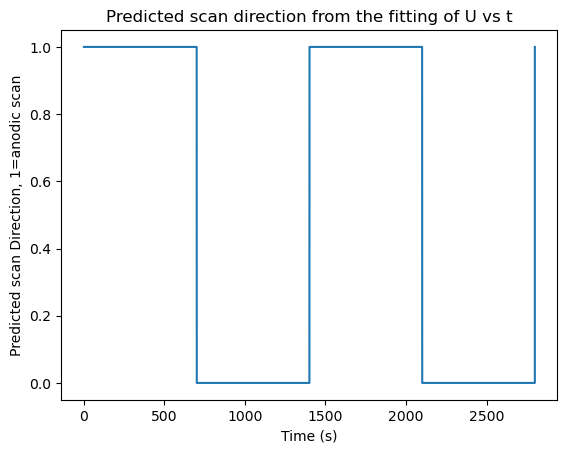

In [15]:
# get in the first spectral object which is for the bentham light source
SpEC1 = sp.SpEC()
SpEC1.read_CV(CV_path)
SpEC1.generate_interpolation_function()
SpEC1.read_Andorspec(AndorPath)
SpEC1.Calibrate_Andorspec()
SpEC1.populate_spec_scans()
SpEC1.populate_CV_scans()


In [16]:
SpEC1.Downsample_spec_scans(0.001, 1)

{0: {'Anodic': Voltage (V)             0.441         0.442         0.443         0.444  \
  Wavelength (nm)                                                           
  400              3.308359e+06  3.346196e+06  3.360824e+06  3.362852e+06   
  401              3.294508e+06  3.332414e+06  3.346524e+06  3.347960e+06   
  402              3.469353e+06  3.509547e+06  3.524002e+06  3.525537e+06   
  403              3.629077e+06  3.670353e+06  3.685766e+06  3.686257e+06   
  404              3.831406e+06  3.874566e+06  3.891410e+06  3.892183e+06   
  ...                       ...           ...           ...           ...   
  938              3.011183e+06  3.041738e+06  3.054251e+06  3.055351e+06   
  939              2.989637e+06  3.022542e+06  3.035635e+06  3.036721e+06   
  940              2.942867e+06  2.973714e+06  2.986833e+06  2.987201e+06   
  941              2.880257e+06  2.909920e+06  2.922021e+06  2.922473e+06   
  942              2.782390e+06  2.812810e+06  2.824662e+06  2.

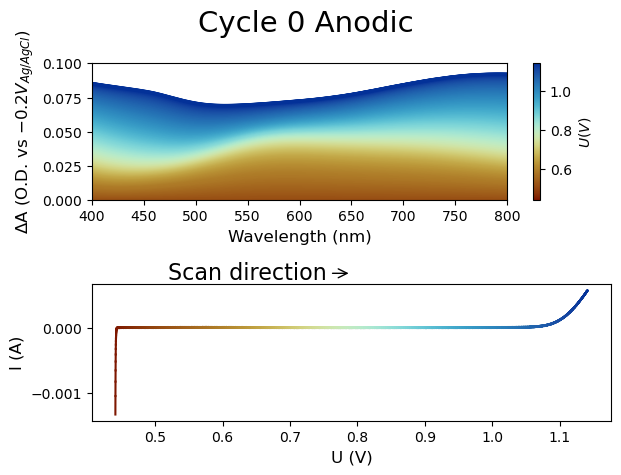

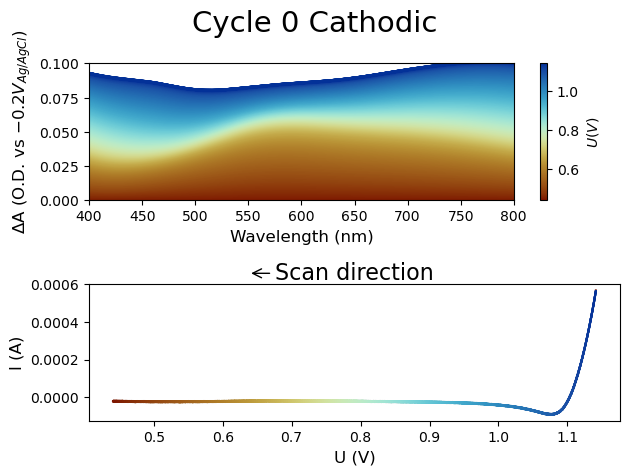

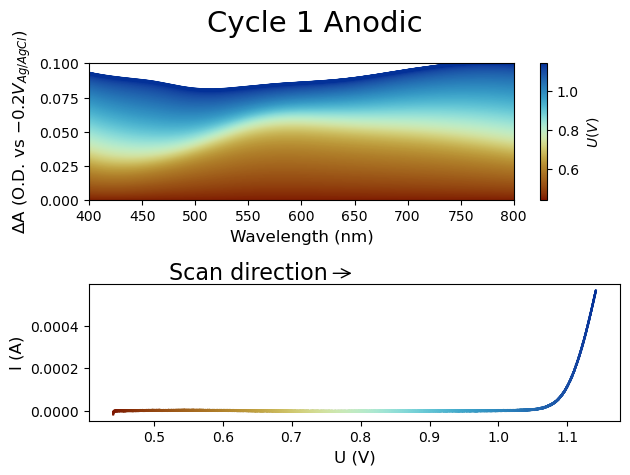

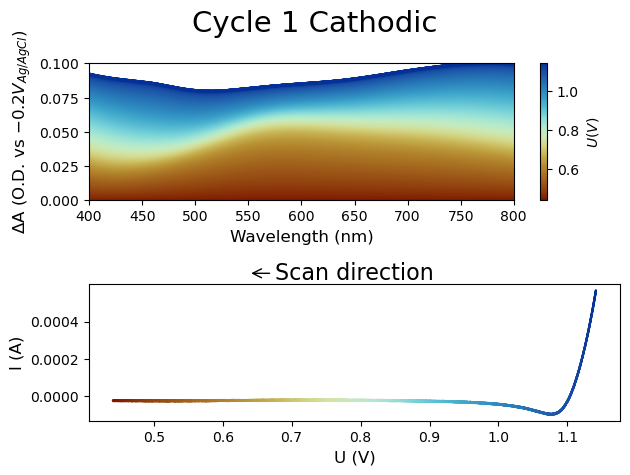

In [17]:


for key, value in SpEC1.CV_scans.items():

        for key2, value2 in value.items():
            CV=SpEC1.CV_scans[key][key2]
            if key2 == 'Anodic':
                test, ref =sp.calculateDOD(SpEC1, key, key2, -0.2, 101)
                sp.Co_plot_DOD_and_CV(test,
                                      CV,
                                        Title=f'Cycle {key} {key2}',
                                          y_max=0.1, y_min=-0.0,
                                            x_min=400, x_max=800,
                                              reference_potential=f"$ {ref}V_{{Ag/AgCl}}$",
                                                scan_direction=key2,
                                                  cmap_option=cmc.roma)
            elif key2 == 'Cathodic':
                test, ref =sp.calculateDOD(SpEC1, key, key2, -0.2, 101)
                sp.Co_plot_DOD_and_CV(test,
                                      CV,
                                        Title=f'Cycle {key} {key2}',
                                          y_max=0.1, y_min=-0.,
                                            x_min=400, x_max=800,
                                              reference_potential=f"$ {ref}V_{{Ag/AgCl}}$",
                                                scan_direction=key2,
                                                  cmap_option=cmc.roma)
            #plt.savefig(os.path.join(full_output_path, f'Cycle_{key}_{key2}.png'))
            plt.close() 

(543, 701)

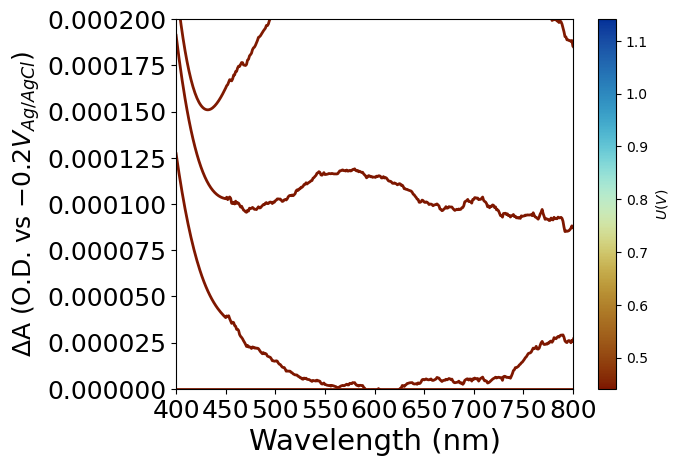

In [18]:
data, ref=sp.calculateDOD(SpEC1, 1, 'Anodic', -0.2, 101)
sp.plot_DOD(data, y_max=0.0002, y_min=-0, x_min=400, x_max=800, reference_potential=f"$ {ref}V_{{Ag/AgCl}}$")
data.shape

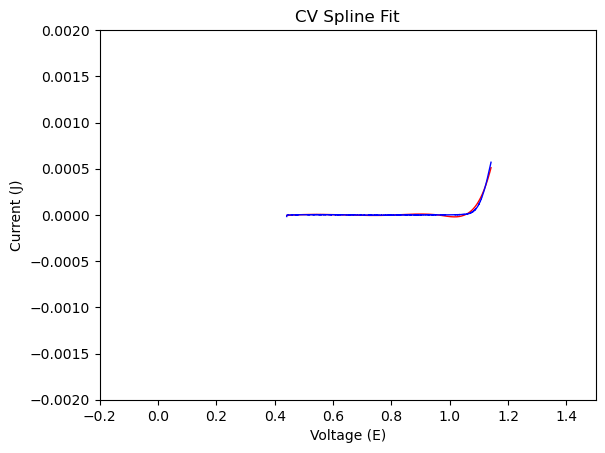

array(-0.0006892)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline


test=SpEC1.CV_scans[1]['Anodic']
# Extract current and voltage data from the DataFrame
J = test.iloc[:, 2]
E = test.iloc[:, 1]

# Sort the data by voltage
sorted_indices = np.argsort(E)
E_sorted = E.iloc[sorted_indices]
J_sorted = J.iloc[sorted_indices]

# Fit the CV to a spline function
spl = UnivariateSpline(E_sorted, J_sorted)
spl.set_smoothing_factor(0.000001)

# Plot the spline function
plt.plot(E_sorted, spl(E_sorted), 'r', lw=1)

# Plot the original data
plt.plot(E_sorted, J_sorted, 'b', lw=1) 
plt.xlabel('Voltage (E)')
plt.ylabel('Current (J)')
plt.title('CV Spline Fit')
# set the x range from -0.2 to 1.5
plt.xlim(-0.2, 1.5)

# set the y range from -0.002 to 0.002
plt.ylim(-0.002, 0.002)

plt.show()

# use the spline function to calculate the current at a specific voltage
spl(0.)





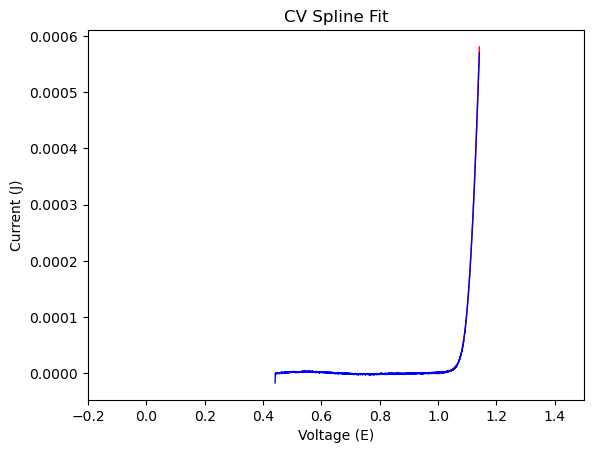

In [20]:
sp.fit_current_to_univariate_spline(J=J,U=E, smoothing_factor=0.00000001)

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs $\\delta 5 mV$)'>)

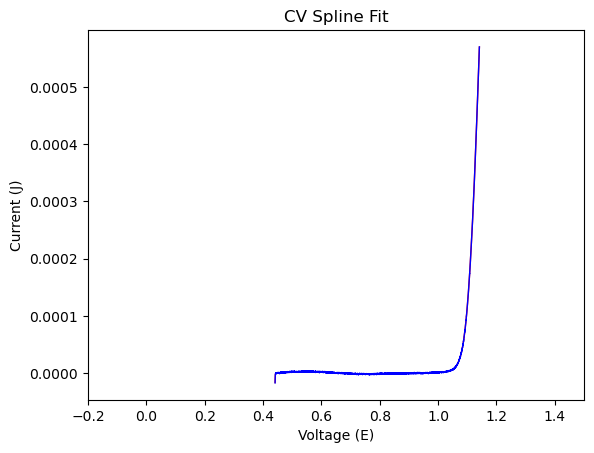

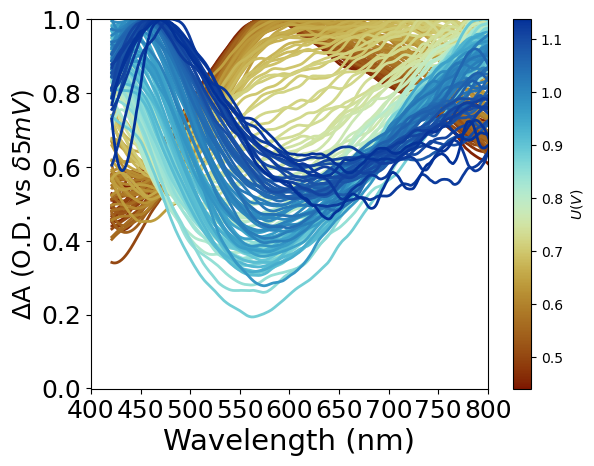

In [35]:
data, ref=sp.calculateDOD(SpEC1, 1, 'Anodic', -1, 21)

# remove data less than 420 nm and greater than 850 nm
data=data[(data.index>420) & (data.index<850)]

data=sp.iR_correct_spectrum(data, J, E, 0.42)

data_diff=sp.calculate_differential_spectra(DOD_dataframe=data, voltage_step=0.004, smooth_strength=51, Normalise=True)

sp.plot_DOD(data_diff, y_max=1, y_min=-0.001, x_min=400, x_max=800, reference_potential=f"$\delta 5 mV$")

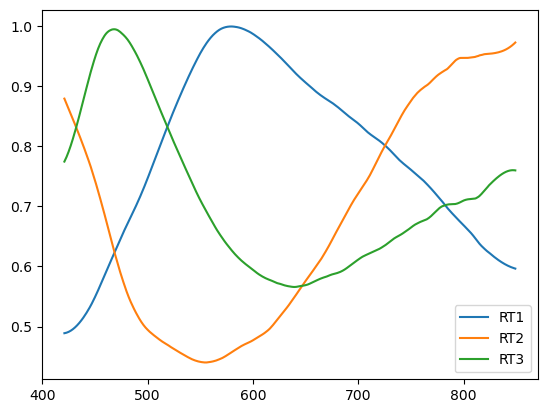

In [36]:
alpha1=sp.extract_average_spectrum_in_voltage_window(data_diff, 0.4, 0.48)
alpha2=sp.extract_average_spectrum_in_voltage_window(data_diff, 0.8, 0.81)
alpha3=sp.extract_average_spectrum_in_voltage_window(data_diff, 1.1, 1.2)

plt.plot(alpha1.index, alpha1.values, label='RT1')
plt.plot(alpha2.index, alpha2.values, label='RT2')
plt.plot(alpha3.index, alpha3.values, label='RT3')

plt.legend()

# combine alpha1, alpha2 and alpha3 into a single dataframe
alphas=pd.concat([alpha1, alpha2, alpha3], axis=1)



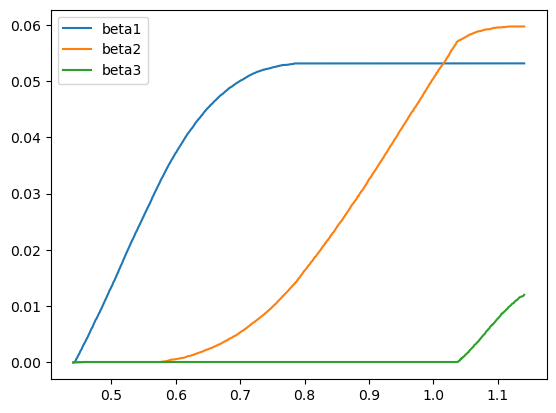

In [38]:
import numpy as np
import pandas as pd
from scipy.optimize import lsq_linear
import matplotlib.pyplot as plt

def fit_dod_to_beta_spectra(dod_df, *betas):
    betas_matrix = np.vstack(betas).T  # Stack beta spectra into a matrix
    num_betas = len(betas)
    fitted_alphas = []
    initial_guess = np.zeros(num_betas)
    lower_bounds = np.zeros(num_betas)  # Initial lower bounds are zeros
    upper_bounds = np.inf  # Upper bounds are infinity
    
    for i, column in enumerate(dod_df.columns):
        y = dod_df[column].values
        bounds = (lower_bounds, upper_bounds)
        result = lsq_linear(betas_matrix, y, bounds=bounds, lsmr_tol='auto')
        fitted_alphas.append(result.x)
        lower_bounds = result.x  # Update lower bounds for the next iteration
        
    return pd.DataFrame(fitted_alphas, columns=[f'beta{i+1}' for i in range(num_betas)], index=dod_df.columns)

# Fit the DOD data to the beta spectra
fit = fit_dod_to_beta_spectra(data, alpha1, alpha2, alpha3)
# Example usage:
# dod_df = pd.DataFrame(...)  # Your DOD dataframe
# beta1 = np.array(...)  # Your first beta spectrum
# beta2 = np.array(...)  # Your second beta spectrum
# fit = fit_dod_to_beta_spectra(dod_df, beta1, beta2)
# Plot fit against the index of fit
for column in fit.columns:
    plt.plot(fit.index, fit[column], label=column)
plt.legend()
plt.show()





(701, 3) (543, 3)


(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='Wavelength (nm)', ylabel='$\\Delta$A (O.D. vs $\\delta 5 mV$)'>)

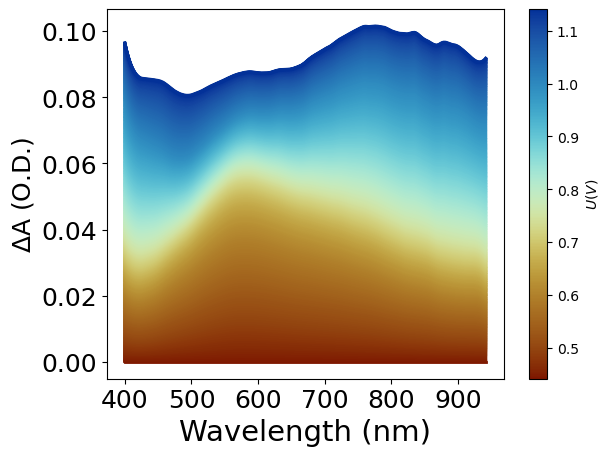

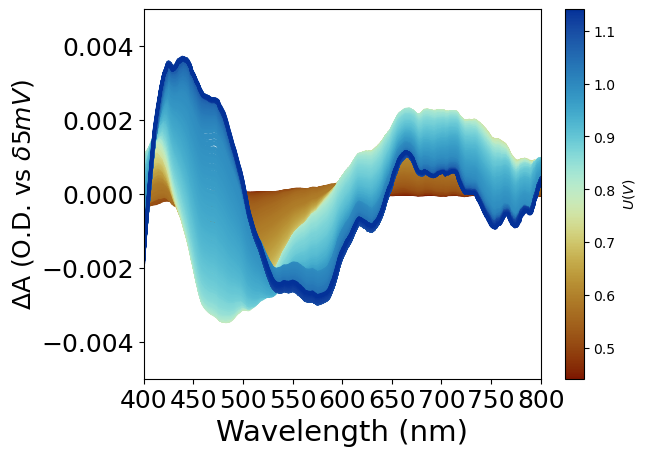

In [25]:
# multiply the betas at each potential by the alpha values to get the DOD values

print(fit.shape, alphas.shape)

# create a new dataframe with the same index and collumns as data
# multiplt fit by alpha.T using np.outer
dod_fit = pd.DataFrame(alphas.values @ fit.values.T)
#set the index and collumns of the new dataframe to be the same as data
dod_fit.index = data.index
dod_fit.columns = data.columns
sp.plot_DOD(dod_fit)


# calculate the residuals between the DOD data and the fit
residuals = data - dod_fit

# plot the residuals
sp.plot_DOD(residuals, y_max=0.005, y_min=-0.005, x_min=400, x_max=800, reference_potential=f"$\delta 5 mV$")